In [21]:
import numpy as np

threshold = 0.0000000000001
beta =0.85


In [22]:
def calculateRank(A):

    arr=np.array(A, dtype=float)

    s=[]

    for i in range(0, len(A)):
        s.append(np.sum(arr[:,i]))


#     print("Summation of columns: ", s)   

    M=arr

    for j in range(0, len(A)):
        M[:,j]=M[:,j]/s[j]

#     print("Column stochastic probability matrix, M:")
#     print(M)

    r=(1.0+np.zeros([len(M), 1]))/len(M)

#     print("Initial rank vector:")
#     print(r)

    uniformR=(1.0-beta)*r

    r_prev=r

    for i in range(1, 1001):
    #     print("Iteration: ", i)
        r=beta*np.matmul(M, r_prev)+uniformR

    #     print("The rank vector: ")
    #     print(r)

        diff=np.sum(abs(r-r_prev))
        if (diff<threshold):
            break

        r_prev=r
    return r


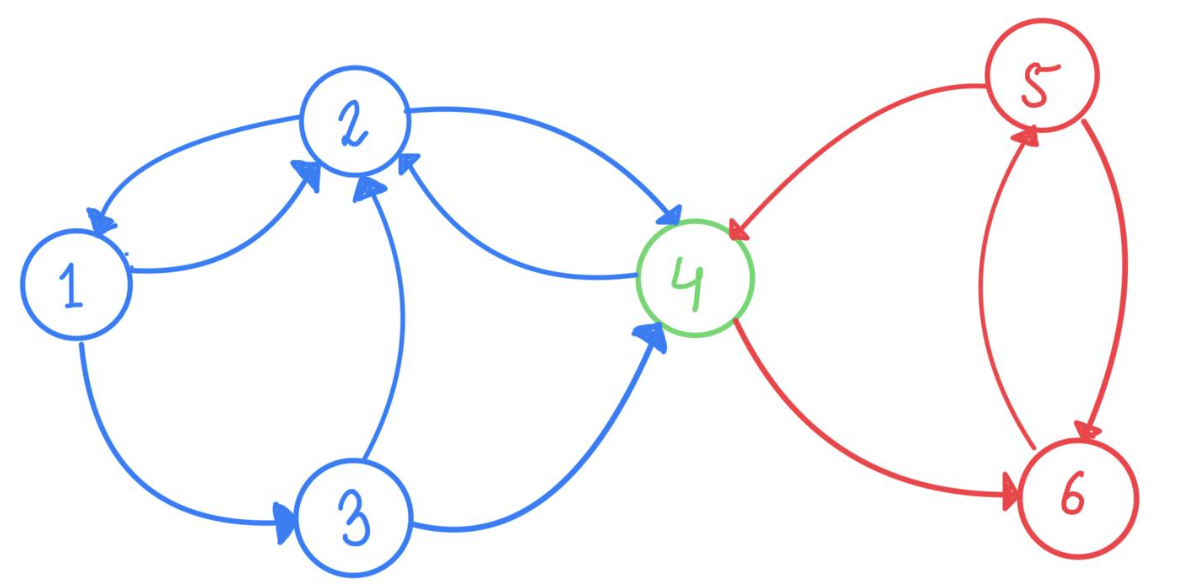

In [23]:
# The first graph
A =[[0,1,0,0,0,0],
   [1,0,1,1,0,0],
   [1,0,0,0,0,0],
   [0,1,1,0,1,0],
   [0,0,0,0,0,1],
   [0,0,0,1,0,1]]

productRanks = calculateRank(A)
print("The final rank vector: ")
print(productRanks[:, 0])

The final rank vector: 
[0.1148294  0.2113633  0.0738025  0.24986999 0.12197003 0.22816478]


## Lets focus on the rank of Node 3
## Here the rank is 0.0738025

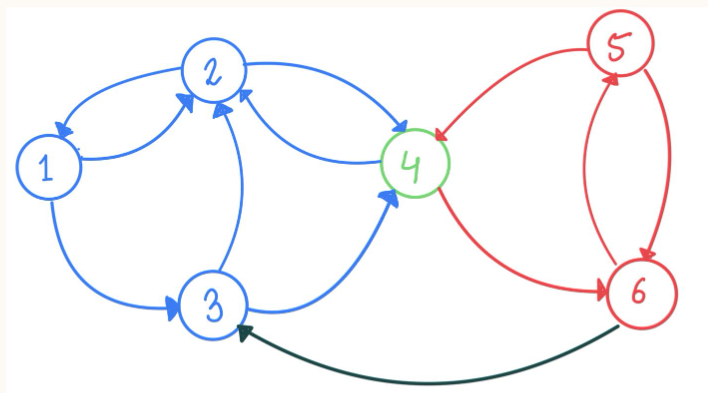

In [24]:
# Adding a link from the football related products to one of the cricket related products
A =[[0,1,0,0,0,0],
   [1,0,1,1,0,0],
   [1,0,0,0,0,1],
   [0,1,1,0,1,0],
   [0,0,0,0,0,1],
   [0,0,0,1,0,1]]

productRanks = calculateRank(A)
print("The final rank vector: ")
print(productRanks[:, 0])

The final rank vector: 
[0.12656284 0.2389714  0.13013506 0.24676421 0.07634585 0.18122064]


## After adding a link from a football related product to Node 3, its rank has changed.
## New Rank = 0.13013506
## Difference = 0.0563481

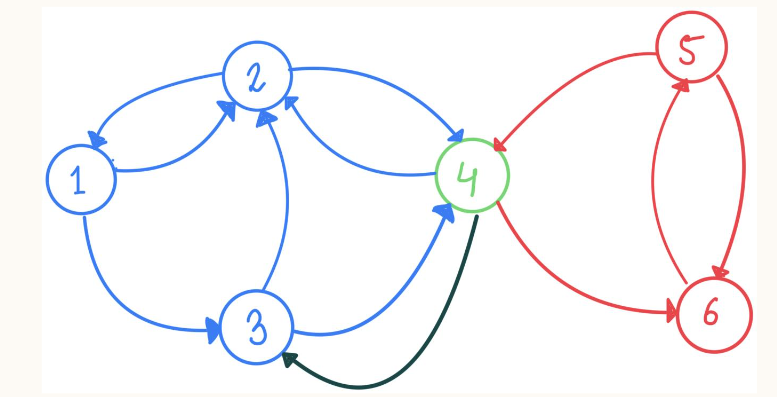

In [25]:
# Adding a link from one of the common products to one of the cricket products 
A =[[0,1,0,0,0,0],
   [1,0,1,1,0,0],
   [1,0,0,1,0,0],
   [0,1,1,0,1,0],
   [0,0,0,0,0,1],
   [0,0,0,1,0,1]]

productRanks = calculateRank(A)
print("The final rank vector: ")
print(productRanks[:, 0])

The final rank vector: 
[0.11408717 0.20961687 0.14709956 0.25980887 0.09788751 0.17150002]


## If we add a link from a common product to Node 3, there is a change in the rank again.
## New Rank = 0.14709956
## Difference = 0.07329706